## Solving a simple Ordinary Differential Equation (ODE) using a neural network

Reference: https://towardsdatascience.com/using-neural-networks-to-solve-ordinary-differential-equations-a7806de99cdd

Simple ODE $ u' = f(x) = 2x $<br>
Initial Condition $ u(0) = 1 $<br>
Analytical Solution = $ x^2 + 1 $<br>
Domain $ = x \in [0,1] $<br>
$ g(x) = u(0) + x*NN(x) $<br>
g is a solution to u satisfying IC<br>
Train g' to be u' to satisfy ODE

In [ ]:
import tensorflow as tf
# Number of neurons in each of the 4 layers
n_input, n_hidden_1, n_hidden_2, n_output = 1, 32, 32, 1
# Random initialisation of weights between layers
weights = {
'w1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'w2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'wout': tf.Variable(tf.random.normal([n_hidden_2, n_output]))}
# Random initialisation of biases
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'bout': tf.Variable(tf.random.normal([n_output]))}

In [ ]:
def NN(x): # 2 hidden layers each with sigmoid activation, followed by output layer
  layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['wout']) + biases['bout']
  return output

In [ ]:
u0 = 1
def g(x):
  return tf.add(tf.multiply(x,NN(x)),u0)
def f(x):
  return tf.scalar_mul(2.0,x)

In [ ]:
N, xmin, xmax = 10, 0, 1 # 10 random points in [0,1]
x = tf.random.uniform((N,1), xmin, xmax, dtype='float32')

In [ ]:
def loss_fxn(x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    g_val = g(x)
  grad_gx = tape.gradient(g_val,x)
  error = grad_gx - f(x)
  loss = tf.reduce_mean(tf.square(error))
  return loss

In [ ]:
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)
def train_step():
  with tf.GradientTape() as tape:
    loss = loss_fxn(x)
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
  return loss

Final Loss = 0.002217935


Text(0, 0.5, 'Loss')

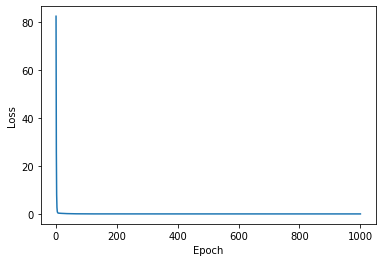

In [ ]:
training_steps = 1000
losses = []
for i in range(training_steps):
  loss = train_step()
  losses.append(loss.numpy())
print('Final Loss = '+str(losses[-1]))
epochs = [i for i in range(1,training_steps+1)]
import matplotlib.pyplot as plt
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

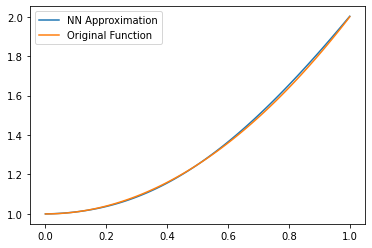

In [ ]:
import numpy as np
def true_sol(x):
  return tf.add(tf.square(x),1)
xspace = np.linspace(0,1,100)
x_inp = xspace.reshape(xspace.shape[0],1)
X = tf.cast(x_inp,'float32')
U = g(X).numpy()
UA = true_sol(X).numpy()
plt.plot(xspace, U, label = 'NN Approximation')
plt.plot(xspace, UA, label = 'Original Function')
plt.legend()